In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
!ls /content/drive/MyDrive/


 1618500990569.jpg
 1FinalNMSproof.pdf
 _2f9e7716d97268d9aaba4c3a984df786_Content-Marketing-Research-_The-Crucial-First-Step_.pdf
'414- The Impact of Globalization on the Digital Media Consumption Pattern: A Modernist Perspective-Serial-09.docx'
'59_Hasnain Imtiaz.jpg'
'About Database.gdoc'
'Academia Saved Papers'
'Academic CV.gdoc'
'Accessibility and user experience.gdoc'
'Access to Justice for Rohingya Community.pdf'
'Advanced _Threat_Detection'
'*An Investigation of Human Interaction with (Dis)information Through Social Media in Bangladesh .gdoc'
 Answers.gdoc
 application.gdoc
 Application.gdoc
'APT - Detection.gdoc'
'Arguments and Design.gdoc'
'Art & Aesthetic Assignment.gdoc'
'Art & Aesthetic Assignment - Line chart 1.gsheet'
'Art and Aesthetic.gdoc'
 article.gdoc
 ASK-HR-Booklet-English-2018-Correction-20-06-19.pdf
'Assessment on Demands of the Digital Learning Services through E-learning Platform in Bangladesh. .gform'
'Assignment 1 and 2.gdoc'
'(Assignment - 2).gdoc'
 Atik
 Av

In [33]:
!ls /content/drive/MyDrive/Advanced\ _Threat_Detection/UNSW-NB15/CSV_Files/training_testing_data/
# !ls /content/drive/MyDrive/Advanced\ _Threat_Detection/UNSW-NB15/
# !ls /content/drive/MyDrive/Advanced\ _Threat_Detection/UNSW-NB15/CSV_Files/
# !ls /content/drive/MyDrive/Advanced\ _Threat_Detection/UNSW-NB15/CSV_Files/Training\ and\ Testing\ Sets/

ls: cannot access '/content/drive/MyDrive/Advanced _Threat_Detection/UNSW-NB15/CSV_Files/training_testing_data/': No such file or directory


In [6]:
train_path = '/content/drive/MyDrive/Advanced _Threat_Detection/UNSW-NB15/CSV_Files/Training_and_Testing_Sets/Training_Dataset.csv'
test_path = '/content/drive/MyDrive/Advanced _Threat_Detection/UNSW-NB15/CSV_Files/Training_and_Testing_Sets/Testing_Dataset.csv'


In [7]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [36]:
# Dividing the train data into attack and non-attack category

normal = train[train['label'] == 0]
anomaly = train[train['label'] == 1]

## **Numerical Features Distribution Plots**

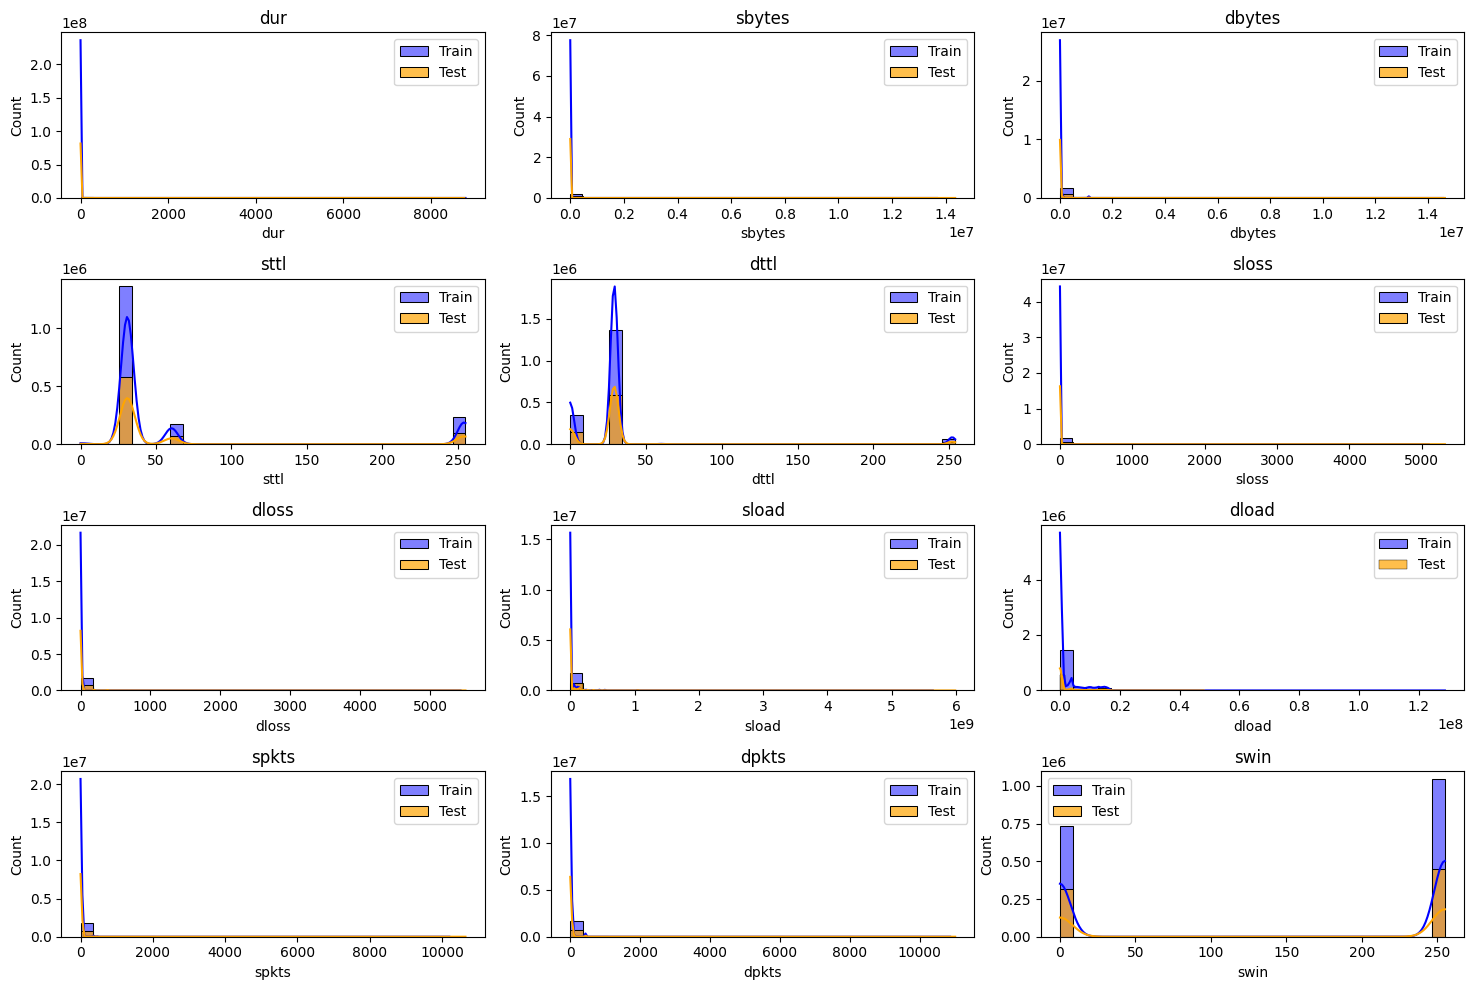

In [37]:
numeric_features = train.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_features[:12]):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=train, x=col, kde=True, bins=30, color='blue', label='Train')
    sns.histplot(data=test, x=col, kde=True, bins=30, color='orange', label='Test', alpha=0.7)
    plt.legend()
    plt.title(col)

plt.tight_layout()
plt.show()

## Class Balance: Target Variable Distribution

In [38]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778032 entries, 0 to 1778031
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

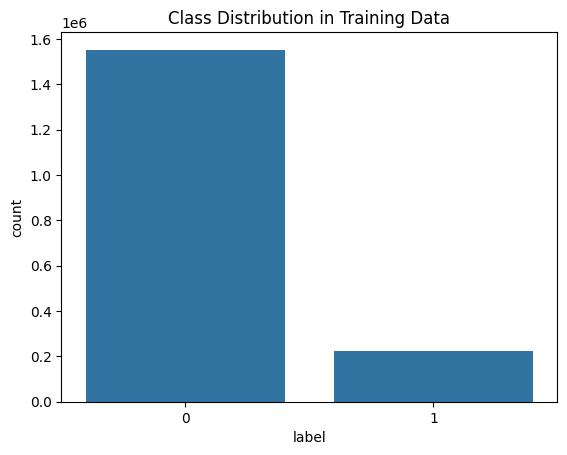

In [39]:
sns.countplot(x='label', data=train)
plt.title("Class Distribution in Training Data")
plt.show()

## **Enhanced Heatmap Visualizations: Using Utility Function**

In [40]:
def multi_corr(col1, col2='label', df=train):
  corr = df[[col1, col2]].corr().iloc[0,1]
  log_corr = df[col1].apply(np.log1p).corr(df[col2])
  print(f"Correlation: {corr}\nLog Correlation: {log_corr}")

def corr(col1, col2='label', df=train):
  return df[[col1, col2]].corr().iloc[0,1]

def calculate_vif(df):

  " This function works to calculate Variance Inflation Factor for all numeric features."

  features = df.select_dtypes(include=[np.number])
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(features)
  vif_data = pd.DataFrame()
  vif_data["Feature"] = features.columns
  vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(features.shape[1])]
  return vif_data

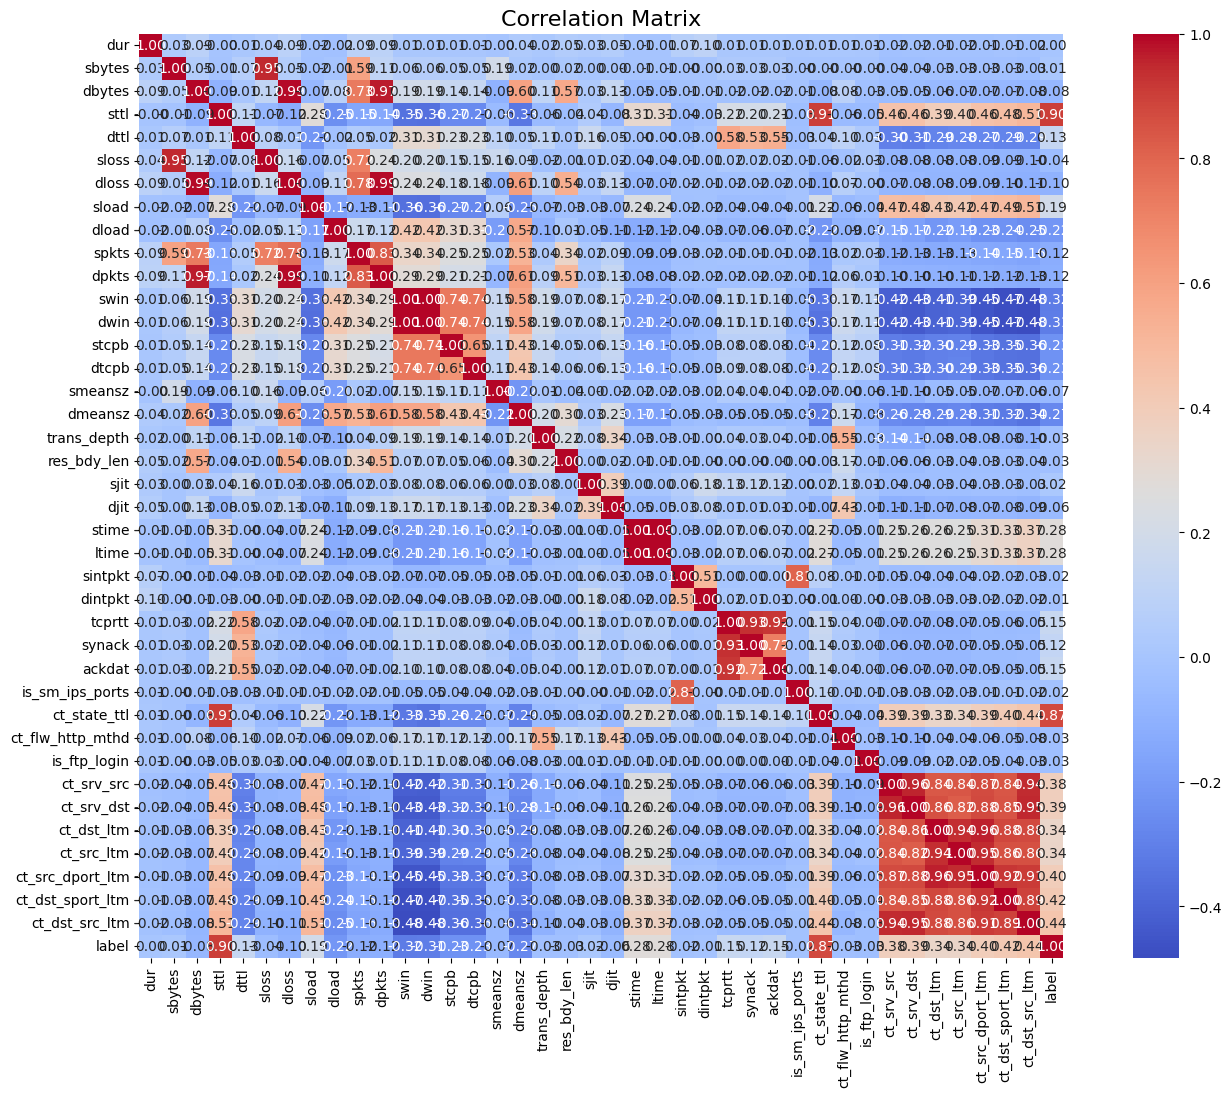

In [41]:
numeric_train = train.select_dtypes(include=[np.number])
method = 'pearson'
corr_mat = numeric_train.corr(method=method)

plt.figure(figsize=(18,12))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()



In [42]:
# Highlighting Highly Correlated Values

columns = corr_mat.columns
limit = 0.8
high_corr = [
    (columns[i], columns[j], corr_mat.iloc[i,j])
    for i in range(corr_mat.shape[0])
    for j in range(i+1, corr_mat.shape[0])
    if corr_mat.iloc[i,j] >= limit
]

print("Highly Correlated Features: ")
for col1, col2, corr_value in high_corr:
  print(f"{col1:20s} {col2:20s} {corr_value}")

Highly Correlated Features: 
sbytes               sloss                0.9515464133660682
dbytes               dloss                0.9912941785427634
dbytes               dpkts                0.9705744719061106
sttl                 ct_state_ttl         0.9058027624589845
sttl                 label                0.9043459910087561
dloss                dpkts                0.9921743916746946
spkts                dpkts                0.8301264370244882
swin                 dwin                 0.9971933359586712
stime                ltime                0.9999999998073185
sintpkt              is_sm_ips_ports      0.8053701105177007
tcprtt               synack               0.9332414134584021
tcprtt               ackdat               0.9202047490089745
ct_state_ttl         label                0.873090304277337
ct_srv_src           ct_srv_dst           0.956721026945663
ct_srv_src           ct_dst_ltm           0.8366669741449261
ct_srv_src           ct_src_ltm           0.84057830799995

# Collecting Highly Correlated Features

*   Highly correlated features contain similar information, and one feature can often predict another with reasonable accuracy.
By identifying such correlations, redundant features can be removed, reducing the dataset's dimensionality without losing significant predictive power. This improves computational efficiency and reduces the risk of overfitting when training machine learning models.

*   Features with strong correlations often indicate meaningful relationships within the data. For APT detection, these relationships can signify patterns or behaviors that are consistent indicators of threats or normalcy.For example, network traffic volume and protocol usage might be highly correlated during a DDoS attack. Identifying such pairs can guide feature engineering efforts.






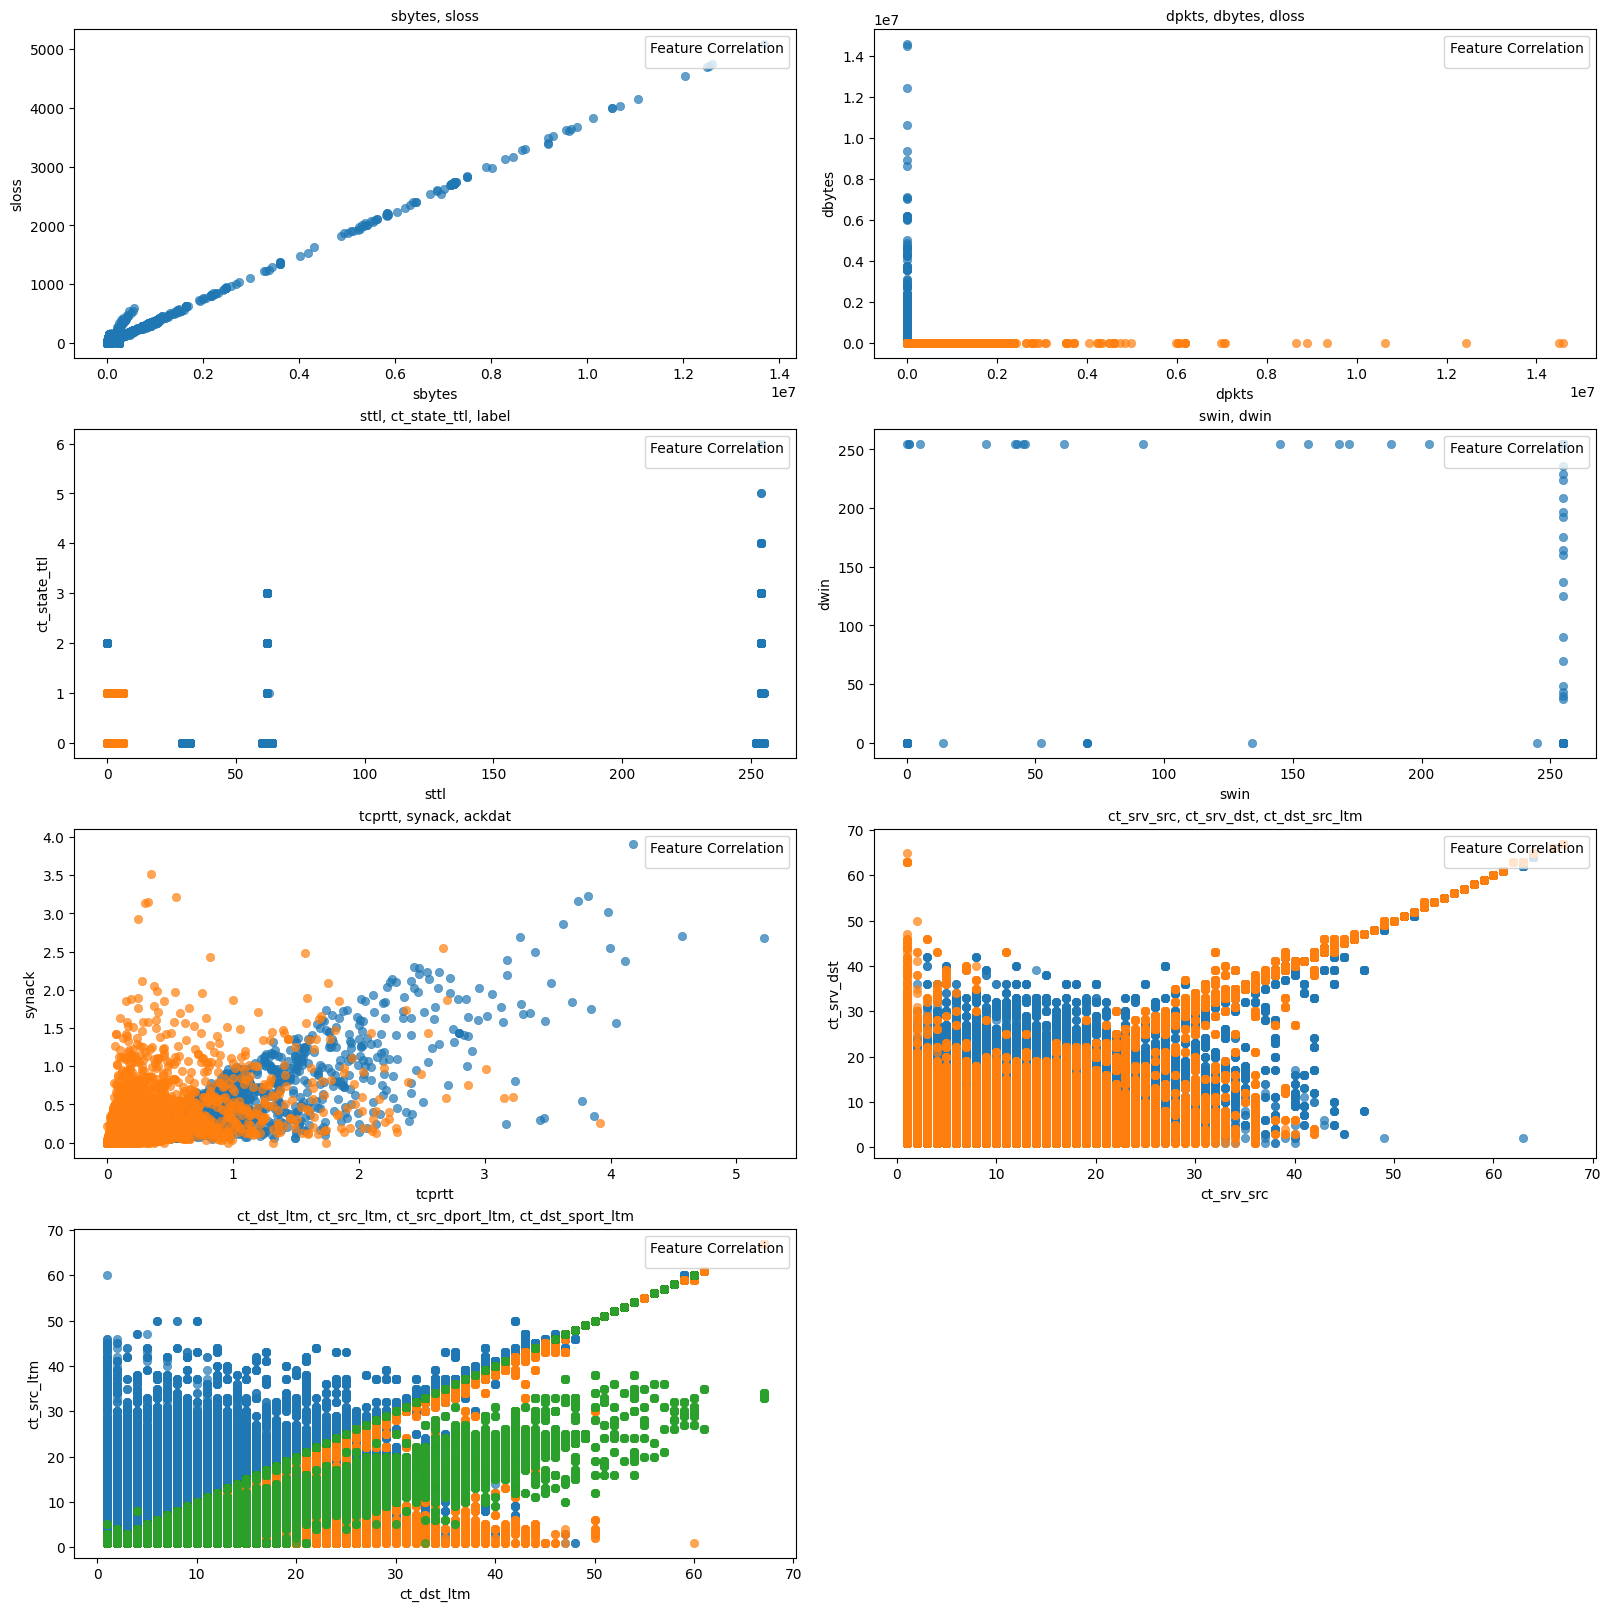

In [43]:
pairplot_features = [
    ['sbytes', 'sloss'],
    ['dpkts', 'dbytes', 'dloss'],
    ['sttl', 'ct_state_ttl', 'label'],
    ['swin', 'dwin'],
    ['tcprtt', 'synack', 'ackdat'],
    ['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'],
    ['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm']
]

# Calculate the grid size
n_groups = len(pairplot_features)
n_cols = 2
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4), constrained_layout=True)
axes = axes.flatten()

# scatterplots for each feature group
for idx, features_group in enumerate(pairplot_features):
    ax = axes[idx]
    for i in range(len(features_group) - 1):
        sns.scatterplot(
            data=train,
            x=features_group[i],
            y=features_group[i + 1],
            ax=ax,
            alpha=0.7,
            edgecolor=None
        )
    ax.set_title(", ".join(features_group), fontsize=10)
    ax.legend(title='Feature Correlation', loc='upper right')

for idx in range(len(pairplot_features), len(axes)):
    axes[idx].axis('off')
plt.show()


## **Interpretation of the Scatter Plots:-->**

APTs (Advanced Persistent Threats) are complex and stealthy, involving multiple stages and exploiting relationships between variables over time.
The feature analysis from the visualization highlights:
Temporal Dependencies: Features like tcprtt, synack, and ackdat (TCP-related timing features) form clusters in their scatter plots, hinting at APT patterns.

Rare Event Identification: Features with clustered outliers (e.g., ct_srv_dst and ct_dst_src_ltm) can identify abnormal traffic associated with malicious activities, aiding in anomaly detection models.

**Highly Linear Relationships:**

* `sbytes` vs. `sloss`: A perfectly linear pattern suggests redundant information, as bytes sent and segment losses likely occur simultaneously. This relationship must be handled in preprocessing to avoid overfitting.
Saturated Features:

* `dpkts`, `dbytes`, and `dloss` scatter show asymptotic patterns, likely representing fixed bandwidth/packet size limits. This is common in regular traffic but could mark deviations in APT detection.
Clustered Data:

* Features like `sttl`, `ct_state_ttl`, and `label` show clusters for normal and attack labels. This confirms the dataset's separation of normal vs. malicious states, critical for classification tasks.
Outliers in TCP Features:

* `tcprtt`, `synack`, and `ackdat` exhibit widely dispersed scatter points, suggesting irregularities in acknowledgment traffic, often indicative of reconnaissance or lateral movement in APT attacks.
Behavioral Features:

* Features like `ct_srv_src`, `ct_srv_dst`, and `ct_dst_src_ltm` (connection counts) exhibit outliers on higher traffic counts. These could point to DoS or brute-force APT behaviors, where an attacker generates unusually high traffic to achieve persistence.

In [63]:
min_val = train['dur'].min()
if min_val <= 0:
    train['dur'] += abs(min_val) + 1

In [64]:
train['dur'].describe()

,dur
count,1.778032e+06
mean,6.377463e+00
std,4.121995e+00
min,1.000000e+00
25%,2.614745e+00
50%,6.645109e+00
75%,1.027867e+01
max,1.740084e+01


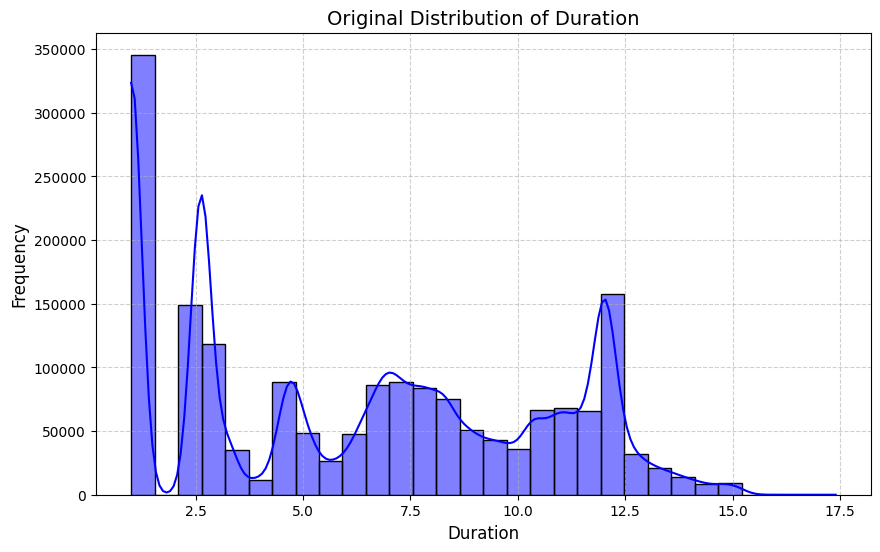

In [65]:
# Original Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['dur'], kde=True, color='blue', bins=30)
plt.title("Original Distribution of Duration", fontsize=14)
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Features Analysis**


In [45]:
train.columns

Index(['dur'], dtype='object')

### **Source vs Destination Jitter**

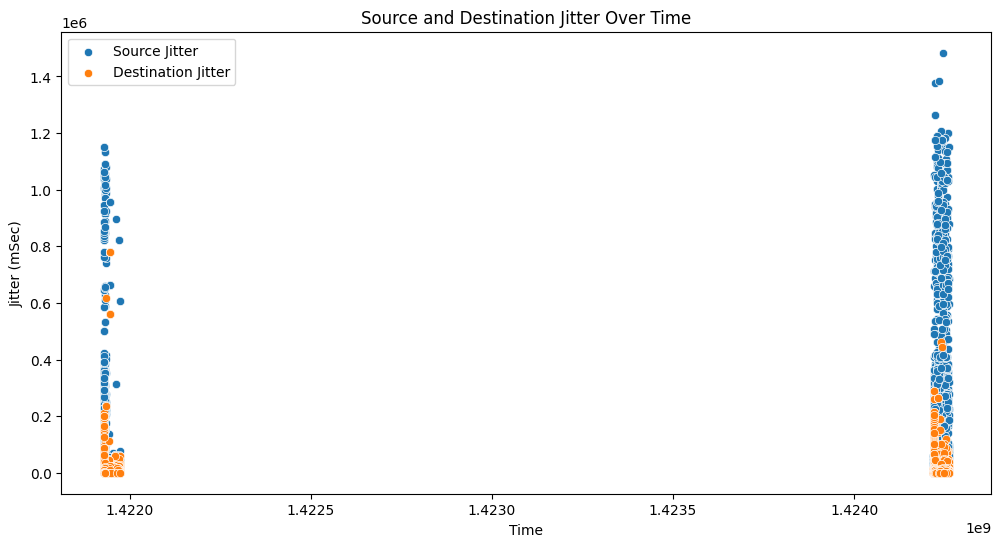

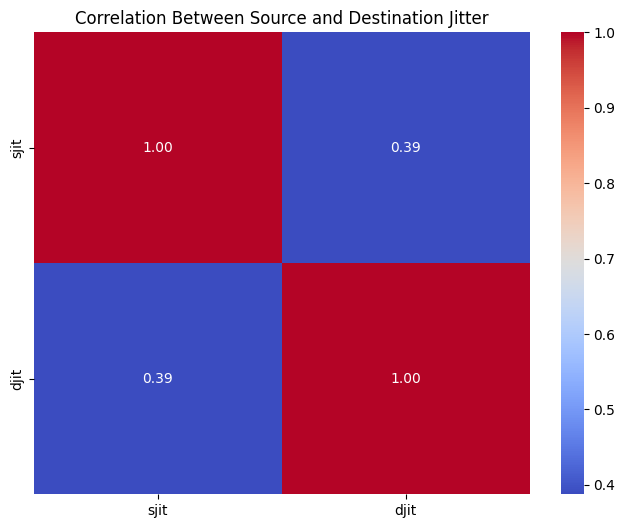

In [69]:
# Scatter plot of Source vs Destination Jitter
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='stime', y='sjit', label='Source Jitter')
sns.scatterplot(data=train, x='ltime', y='djit', label='Destination Jitter')
plt.title('Source and Destination Jitter Over Time')
plt.xlabel('Time')
plt.ylabel('Jitter (mSec)')
plt.legend()
plt.show()

# Heatmap of Source Jitter vs Destination Jitter
plt.figure(figsize=(8, 6))
sns.heatmap(train[['sjit', 'djit']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Source and Destination Jitter')
plt.show()


### **SYN-ACK Timing (synack)**

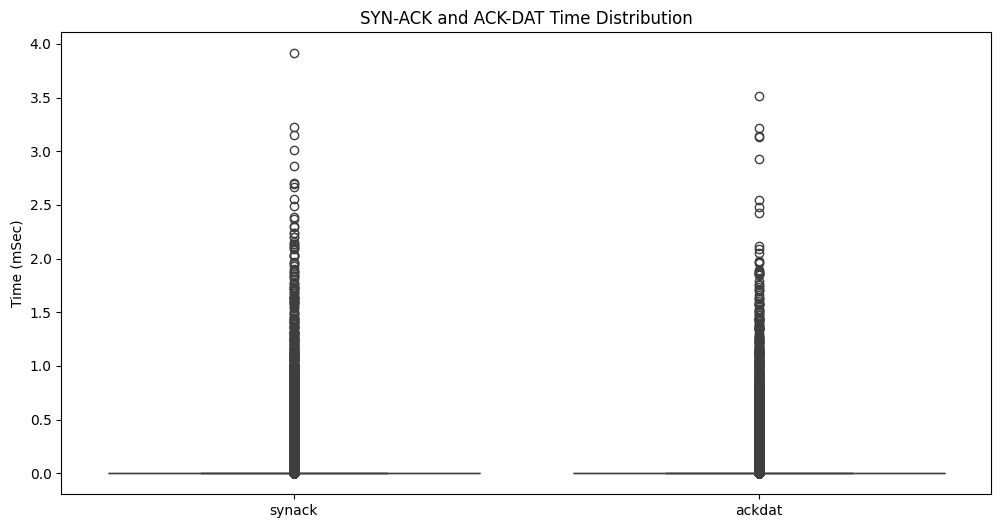

In [78]:
# Boxplot for SYN-ACK and ACK-DAT times
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[['synack', 'ackdat']])
plt.title('SYN-ACK and ACK-DAT Time Distribution')
plt.ylabel('Time (mSec)')
plt.show()

* Both variables have a significant number of outliers, as seen in the scattered circles above the whiskers.

* These outliers extend up to approximately 4 milliseconds for both variables, indicating that a few instances exhibit much higher times compared to the majority.

* The interquartile range (IQR) appears very narrow for both SYN-ACK and ACK-DAT, suggesting that most of the data is tightly clustered near the median.

* The whiskers are also close to the box, showing limited variation in the main data range.

In [74]:
print(train['synack'].describe())
print(train['ackdat'].describe())

count    1.778032e+06
mean     3.279468e-03
std      2.544330e-02
min      0.000000e+00
25%      0.000000e+00
50%      4.830000e-04
75%      5.540000e-04
max      3.912950e+00
Name: synack, dtype: float64
count    1.778032e+06
mean     2.891996e-03
std      2.335112e-02
min      0.000000e+00
25%      0.000000e+00
50%      1.220000e-04
75%      1.400000e-04
max      3.518718e+00
Name: ackdat, dtype: float64


### **Correlation Heatmap**

In [ ]:
# TCP Round-Trip Time (TCPrtt) over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='stime', y='tcprtt', label='TCP RTT')
plt.title('TCP Round-Trip Time Over Time')
plt.xlabel('Time')
plt.ylabel('TCP RTT (mSec)')
plt.legend()
plt.show()